正在处理文件: /DeepLearning/mnt/shixiansheng/data_fusion/output/DFT_ds_2011_July_daily_InUSA.csv, Period: 2011-07-01
x_data 长度: 54024, y_data 长度: 54024
x_data 前5个值: [18.29980087 18.57419968 18.80480003 18.92219925 18.32119942]
y_data 前5个值: [29.59165549 30.05052466 30.47422756 31.56044264 29.29938157]
x_data 中 NaN 的数量: 0
y_data 中 NaN 的数量: 0
{rmse}{mae}


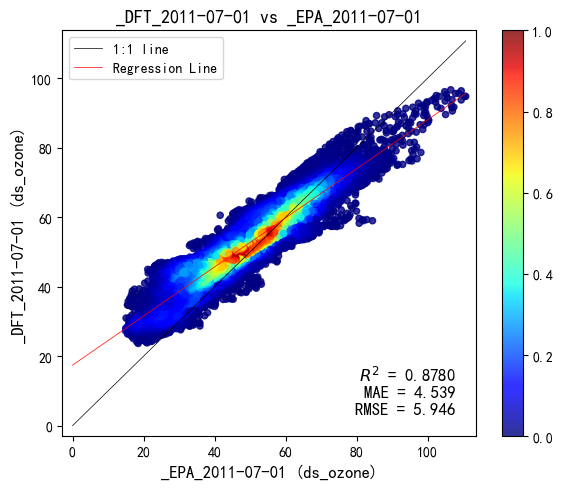

散点密度图已保存至 /DeepLearning/mnt/shixiansheng/data_fusion/output/downscaler/DFT_ds_2011_July_daily_InUSA_2011-07-01_2011_ds_ozone_vs_ds_ozone_density.png
正在处理文件: /DeepLearning/mnt/shixiansheng/data_fusion/output/DFT_ds_2011_July_daily_InUSA.csv, Period: 2011-07-10
x_data 长度: 54024, y_data 长度: 54024
x_data 前5个值: [19.9510994  19.84370041 19.46310043 19.17810059 20.97319984]
y_data 前5个值: [34.02817583 34.49805201 34.98032659 35.88382364 35.07083504]
x_data 中 NaN 的数量: 0
y_data 中 NaN 的数量: 0
{rmse}{mae}


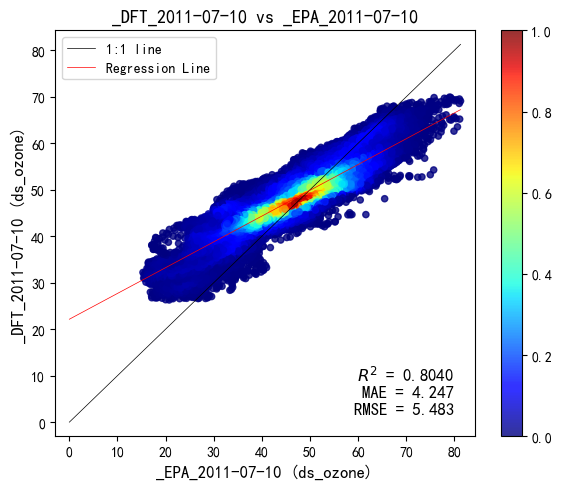

散点密度图已保存至 /DeepLearning/mnt/shixiansheng/data_fusion/output/downscaler/DFT_ds_2011_July_daily_InUSA_2011-07-10_2011_ds_ozone_vs_ds_ozone_density.png


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, linregress
from concurrent.futures import ProcessPoolExecutor
import re

# -------------------- 数据加载 --------------------
# 第一个文件（y 轴数据）
fusion_output_files = [
    "/DeepLearning/mnt/shixiansheng/data_fusion/output/DFT_ds_2011_July_daily_InUSA.csv",
]

# 第二个文件（x 轴数据）
x_axis_file = "/DeepLearning/mnt/shixiansheng/data_fusion/output/EPA_ds_2011_July_daily_InUSA.csv"  # 替换为实际路径

# -------------------- 创建文件夹 --------------------
output_dir = '/DeepLearning/mnt/shixiansheng/data_fusion/output/downscaler'
os.makedirs(output_dir, exist_ok=True)  # 如果文件夹不存在则创建

# -------------------- 工具函数 --------------------
def get_prefix(filename):
    """
    根据文件名确定前缀。
    如果文件名包含 'daily' 或 'IA'，返回 'IA'；否则返回 'AI'。
    """
    if "daily" in filename.lower() or "FtA" in filename:
        return ""
    return ""


def get_axis_label(filename, period=None, year=None):
    """
    根据文件名生成轴标签。
    - 如果文件名包含 'DFT'，标签为 'DFT'。
    - 如果文件名不包含 'DFT'，标签为 'Python'。
    - 结合前缀（IA 或 AI）、Period 和年份生成最终标签。
    """
    prefix = get_prefix(filename)
    if "DFT" in filename.upper():
        label = "DFT"
    elif"Barron" in filename:
        label = "Barron"
    elif"EPA" in filename:
        label = "EPA"
    else:
        label = "Python"
    
    # 添加 Period 和年份到标签中
    if period and year:
        return f"{prefix}_{label}_{period}"
    elif period:
        return f"{prefix}_{label}_{period}"
    elif year:
        return f"{prefix}_{label}_{year}"
    return f"{prefix}_{label}"


# -------------------- 定义绘图函数 --------------------
def plot_density_scatter(dataframe_x, dataframe_y, x_column, y_column, period_column, output_dir, period_value, file_name):
    """
    绘制两张散点密度图：一张为 x_column vs y_column。
    文件名包含对应的 Period 字段。
    """
    # 获取数据（通过关键字匹配 Period）
    df_period_x = dataframe_x[dataframe_x[period_column].str.contains(period_value, case=False, na=False)]
    df_period_y = dataframe_y[dataframe_y[period_column].str.contains(period_value, case=False, na=False)]

    # 如果数据为空，跳过
    if df_period_x.empty or df_period_y.empty:
        print(f"数据中没有有效数据，跳过 Period: {period_value} 的绘图。")
        return

    # 获取数据
    x_data = df_period_x[x_column].values
    y_data = df_period_y[y_column].values

    # 打印正在处理的数据信息
    print(f"正在处理文件: {file_name}, Period: {period_value}")
    print(f"x_data 长度: {len(x_data)}, y_data 长度: {len(y_data)}")
    print(f"x_data 前5个值: {x_data[:5]}")
    print(f"y_data 前5个值: {y_data[:5]}")
    print(f"x_data 中 NaN 的数量: {np.isnan(x_data).sum()}")
    print(f"y_data 中 NaN 的数量: {np.isnan(y_data).sum()}")

    # 移除 NaN 值
    valid_indices = ~np.isnan(x_data) & ~np.isnan(y_data)
    x_data = x_data[valid_indices]
    y_data = y_data[valid_indices]

    # 如果数据为空，跳过
    if len(x_data) == 0 or len(y_data) == 0:
        print(f"数据为空，跳过 Period: {period_value} 的绘图。")
        return
    

    # # 计算 y_data - x_data 的差值,检查数据
    # diff = y_data - x_data

    # # 找到最大差值和最小差值的索引
    # max_diff_index = np.argmax(diff)
    # min_diff_index = np.argmin(diff)

    # # 获取最大差值和最小差值对应的数据
    # max_diff_x = x_data[max_diff_index]
    # max_diff_y = y_data[max_diff_index]
    # min_diff_x = x_data[min_diff_index]
    # min_diff_y = y_data[min_diff_index]

    # # 打印最大差值和最小差值对应的数据及 ROW 和 COL
    # print(f"最大差值: y - x = {diff[max_diff_index]:.3f}")
    # print(f"最大差值对应的数据: x = {max_diff_x:.3f}, y = {max_diff_y:.3f}")
    # print(f"最大差值对应的 ROW 和 COL: ROW = {df_period_x.iloc[max_diff_index]['ROW']}, COL = {df_period_x.iloc[max_diff_index]['COL']}")

    # print(f"最小差值: y - x = {diff[min_diff_index]:.3f}")
    # print(f"最小差值对应的数据: x = {min_diff_x:.3f}, y = {min_diff_y:.3f}")
    # print(f"最小差值对应的 ROW 和 COL: ROW = {df_period_x.iloc[min_diff_index]['ROW']}, COL = {df_period_x.iloc[min_diff_index]['COL']}")

    # 获取文件名的基名
    file_base_name = os.path.basename(file_name).split(".")[0]


    # # 根据文件名判断标题前缀
    # if 'daily' in file_base_name.lower():
    #     title_prefix = 'Daily'
    # elif 'seasonal' in file_base_name.lower():
    #     title_prefix = 'Seasonal'
    # else:
    #     title_prefix = 'Unknown'  # 如果没有匹配的前缀
    title_prefix=''

    # 提取年份
    year = re.search(r"\d{4}", file_base_name).group(0)  # 提取年份

    # 只提取季节和年份部分
    # period_search = re.search(r"(DJF|MAM|JJA|SON|Apr-Sep|Annual|top-10|98th)", period_value)
    period_search = re.search(r"(DJF|MAM|JJA|SON)", period_value)
    if period_search:
        period_value = period_search.group(0)  # 提取季节部分

    # 拼接成期望的格式，如：2011_JAS
    formatted_period = f"{period_value}_{year}"

    # 生成轴标签
    x_label = get_axis_label(x_axis_file, period_value, year)  # x 轴标签
    y_label = get_axis_label(file_name, period_value, year)    # y 轴标签

    # -------------------- 密度散点图 --------------------
    # 核密度计算
    xy = np.vstack([x_data, y_data])
    kde = gaussian_kde(xy)
    z = kde(xy)
    z = (z - z.min()) / (z.max() - z.min())  # 归一化

    # 绘制散点密度图,这边(6,5)也行，不像vna vs model那样需要调整
    fig, ax = plt.subplots(figsize=(6, 5))
    scatter = ax.scatter(x_data, y_data, c=z, cmap='jet', s=20, alpha=0.8)
    fig.colorbar(scatter, ax=ax)  # 删除了 label 参数

    # 添加 1:1 参考线
    max_val = max(x_data.max(), y_data.max())

    #调整x和y轴一样并添加余量，如果数据差别不大
    max_val1 = max_val+3
    ax.set_xlim(-3, max_val1)
    ax.set_ylim(-3, max_val1)

    ax.plot([0, max_val], [0, max_val], 'k-', lw=0.5, label="1:1 line")

    # 添加回归线
    slope, intercept, r_value, _, _ = linregress(x_data, y_data)
    regression_line = slope * np.array([0, max_val]) + intercept
    ax.plot([0, max_val], regression_line, 'r-', lw=0.5, label="Regression Line")
    r_squared = r_value ** 2
    mae = np.mean(np.abs(y_data - x_data))  # 计算 MAE
    rmse = np.sqrt(np.mean((y_data - x_data) ** 2))  # 计算 RMSE
    print("{rmse}{mae}")
    ax.text(0.95, 0.05, f"$R^2$ = {r_squared:.4f}\nMAE = {mae:.3f}\nRMSE = {rmse:.3f}",
            transform=ax.transAxes, ha="right", va="bottom", fontsize=12)

    # 设置标题和标签
    ax.set_xlabel(f'{x_label} ({x_column})', fontsize=12)  # x 轴标签
    ax.set_ylabel(f'{y_label} ({y_column})', fontsize=12)  # y 轴标签
    ax.legend(loc='upper left', fontsize=10)

    # 将标题放置到图像顶部
    fig.subplots_adjust(top=0.85)  # 调整标题的位置
    ax.set_title(f'{y_label} vs {x_label}', fontsize=13, loc='center')

    # 保存图像，文件名包含 Period 字段和输入文件名（不含路径）
    output_file_name = f'{file_base_name}_{formatted_period}_{y_column}_vs_{x_column}_density.png'
    output_path = os.path.join(output_dir, output_file_name)
    plt.tight_layout()
    plt.savefig(output_path, dpi=400)
    plt.show()
    print(f"散点密度图已保存至 {output_path}")

# -------------------- 读取和处理多个文件 --------------------
def process_file(fusion_output_file):
    # 读取第一个文件的数据（y 轴数据）
    df_data_y = pd.read_csv(fusion_output_file)

    # 读取第二个文件的数据（x 轴数据）
    df_data_x = pd.read_csv(x_axis_file)

    # 新增：过滤掉值为 2 的点,对于draw_denisity_plot来说，这边去除后不影响后续MAE等的统计计算
    df_data_x = df_data_x[(df_data_x["ds_ozone"] != 2)]
    df_data_y = df_data_y[(df_data_y["ds_ozone"] != 2)]

    # 提取Period列
    period_column = 'Timestamp'  # Period列
    # x_column_vna = 'vna_ozone'  # x 轴数据列
    x_column_evna = 'ds_ozone'  # x 轴数据列
    # y_column_vna = 'vna_ozone'  # y 轴数据列
    y_column_evna = 'ds_ozone'  # y 轴数据列
    # y_column_avna = 'avna_ozone'
    # x_column_avna = 'avna_ozone'

    # 定义需要匹配的关键字（如 JFM, AMJ, JAS, OND 等）
    # keywords = ['DJF', 'MAM', 'JJA', 'SON', 'Apr-Sep', 'Annual', 'top-10','98th']
    # keywords = ['2011-07-01', '2011-07-02', '2011-07-03', '2011-07-10', '2011-07-14', '2011-07-19', '2011-07-21', '2011-07-25']
    keywords = ['2011-07-01', '2011-07-10']
    # 遍历每个关键字并绘制图形
    for keyword in keywords:
        # 绘制 vna_ozone vs vna_ozone
        # plot_density_scatter(df_data_x, df_data_y, x_column_vna, y_column_vna, period_column, output_dir, keyword, fusion_output_file)
        
        # # 绘制 evna_ozone vs evna_ozone
        plot_density_scatter(df_data_x, df_data_y, x_column_evna, y_column_evna, period_column, output_dir, keyword, fusion_output_file)
        
        # plot_density_scatter(df_data_x, df_data_y, x_column_avna, y_column_avna, period_column, output_dir, keyword, fusion_output_file)

# 使用 ProcessPoolExecutor 实现并行化
with ProcessPoolExecutor() as executor:
    executor.map(process_file, fusion_output_files)